In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [70]:
img_ = cv2.imread('/home/adityan/Studies/EE569_Spring2021/HW3/HW3_material/right.png')
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img = cv2.imread('/home/adityan/Studies/EE569_Spring2021/HW3/HW3_material/middle.png')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [71]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [72]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [73]:
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
        matches = np.asarray(good)

In [74]:
matches=np.array(matches)

In [75]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    #print H
else:
    raise AssertionError("Can't find enough keypoints.")

In [76]:
np.set_printoptions(suppress=True)

In [77]:
H

array([[  0.02443532,  -0.03963136, 278.37038489],
       [ -0.66052918,   0.91866651,  18.91587088],
       [ -0.00295021,   0.00006078,   1.        ]])

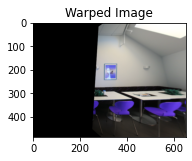

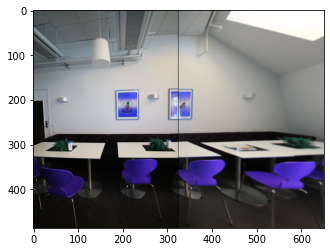

In [78]:
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()

70
15


Text(0, 0.5, 'Frequency')

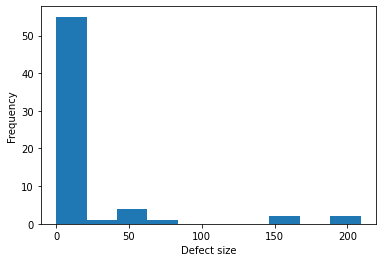

In [85]:

sizes = [4,1,11,4,16,1,1,1,1,32,6,1,4,117,1,14,2,35,4,1,57,4,122,36,109,211,1,3,2,1,9,1,1,94,16,8,3,56,17,47,20,5,1,13,3,5,26,1,8,27,6,44,2,1,6,14,7,17,10,1,21,3,43,4,1,1,4,43,1,1]
print(len(sizes))
sizes = [0,0,196,54,34,209,49,0,79,161,52,0,157,55,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0]
print(len(set(sizes)))
plt.hist(sizes)
plt.xlabel('Defect size')
plt.ylabel('Frequency')